### introduction:
Social media platforms, such as Twitter, have become popular avenues for users to express their opinions, ideas, feelings, and emotions. Twitter, in particular, is well-known for its ability to capture textual expressions of emotions, making it a valuable source for sentiment analysis and textual emotion detection. This project focuses on one of the most recent and popular hashtags on Twitter related to the recent earthquake in Turkey, namely the “#deprem” hashtag. Using the Twitter API, the project obtained access to a dataset of 5,000 tweets that contain the “#deprem” keyword and are written in English.

The main goal of this project is to use a Naive Bayes model to detect and classify the emotions expressed in the tweets related to the Turkey earthquake hashtag. Specifically, the project seeks to answer the following research question: "Can a model using Naive Bayes predict the emotions expressed in tweets related to the earthquake in Turkey, as determined by the NLTK library?" Through this project, we aim to gain a better understanding of the emotions expressed by Twitter users in response to the Turkey earthquake, and to explore the effectiveness of the Naive Bayes algorithm for detecting and classifying emotions in textual data.To accomplish this, the project employs several libraries, including:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from textblob import TextBlob
import sys
import tweepy
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import text2emotion as te
from nrclex import NRCLex
import plotly.express as px
import plotly.express as px
import matplotlib.pyplot as plt
import neattext.functions as nfx
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
import joblib
import eli5

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mehrd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mehrd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mehrd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


To obtain access to the Twitter dataset for this project, I utilized the Twitter developer portal to obtain API keys that enabled me to extract tweets containing the “#deprem” keyword in English.
(Staff, R, 2021)

In [9]:
consumerKey  = "fCoWco1ReEuCgBfn8Gu6xTKGP"
consumerSecret  = "CMqB83l45msOraDzfroLiQISjxLlka6tnPYI6zwfLXfQoe9rNe"
accessToken  = "1615808405402226708-gjYzaDtpxe3NSoLYNTCqUpfUz4dwv7"
accessTokenSecret = "BNrfxQauf7sY4UdSkR0Fgon385xYfGw0PW6fKihww0qbO"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In addition to the Twitter dataset obtained via the Twitter developer portal, this project also utilized a secondary dataset related to the Turkey earthquake from Kaggle. The dataset can be accessed via the following link: [https://www.kaggle.com/datasets/swaptr/turkey-earthquake-tweets]

The dataset obtained from Kaggle was preprocessed to remove any unnecessary information and to extract only the relevant content of the tweets. In order to reduce the computational load of the analysis, only a subset of 10,000 tweets were used for the study. Additionally, the dataset was filtered to include only tweets written in English using this peace of code: 
(lambda x: x.isascii())]

Prior to merging the Kaggle dataset with the Twitter API dataset, it was necessary to ensure that the column names in both datasets were consistent and compatible. In this study, the column names in the Kaggle dataset were modified to match those in the Twitter API dataset, so that the two datasets could be concatenated effectively.

In [10]:
Turkey_tweets = pd.read_csv ('Turkey_tweets.csv')
Turkey_tweets = Turkey_tweets['content']
Turkey_tweets = pd.DataFrame(Turkey_tweets.head(10000))


Turkey_tweets = Turkey_tweets[Turkey_tweets['content'].map(lambda x: x.isascii())]
Turkey_tweets.rename(columns = {'content':'text'},  inplace = True)
Turkey_tweets

C:\Users\mehrd\AppData\Local\Temp\ipykernel_26300\1073780031.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  Turkey_tweets = pd.read_csv ('Turkey_tweets.csv')


,text
3,its a highkey sign for all of us to ponder ove...
5,"See how strong was the #Earthquake of Feb 20, ..."
7,another #earthquake in southern #Turkey. htt...
8,Three people are now confirmed to have died af...
9,6.4 magnitude quake shakes Turkey -Syria borde...
...,...
9992,#earthquake #EarthquakeTurkeySyria #Syria #Tu...
9993,This is a worldwide #precedent! @YouTube is de...
9994,Help never came in #Syria after the #earthquak...
9995,Did you guys find our Video Response to the Fr...


The following "FOR" loop was defined to classify each tweet in the dataset into one of three categories: positive, negative, or neutral. This loop utilized the SentimentIntensityAnalyzer() library to determine the sentiment score of each tweet, which is a composite score ranging from -1 to 1 that represents the overall sentiment of the text. Based on this score, each tweet was classified into one of the three categories, with tweets having a score greater than 0.05 classified as positive, those with a score less than -0.05 classified as negative, and those with a score between -0.05 and 0.05 classified as neutral.

To evaluate the distribution of emotions in the dataset, a function ("emotion_percentage") was defined to calculate the percentage of tweets in each category. This function calculated the percentage of tweets in each category by dividing the number of tweets in that category by the total number of tweets in the dataset and multiplying by 100. This allowed for a quantitative analysis of the distribution of emotions in the dataset and provided insights into the overall sentiment of Twitter users regarding the Turkey earthquake

In [11]:
def emotion_percentage(number,all_number):
    return float(number)*100/float(all_number)
key_word ="#deprem"
number_of_tweets = 5000
tweets = tweepy.Cursor(api.search_tweets, q=key_word, lang = 'en').items(number_of_tweets)
p_tweets = 0
neg_tweets = 0
n_tweets = 0
pol_tweets = 0
tweets_list = []
neg_tweets_list = []
n_tweets_list = []
p_tweets_list = []

for tweet in tweets:
    tweets_list.append(tweet.text)
    cal = TextBlob(tweet.text)
    grade = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg_grade = grade['neg']
    n_grade = grade['neu']
    pos_grade = grade['pos']
    compound_grade = grade['compound']
    pol_tweets += cal.sentiment.polarity
    
    if neg_grade > pos_grade:
        neg_tweets_list.append(tweet.text)
        neg_tweets +=1
    elif pos_grade > neg_grade:
        p_tweets_list.append(tweet.text)
        p_tweets +=1
    elif pos_grade == neg_grade:
        n_tweets_list.append(tweet.text)
        n_tweets +=1

tweets_list = pd.DataFrame(tweets_list)
tweets_list.to_csv('Turkey_earthquake .csv')

p_tweets = emotion_percentage(p_tweets, len(tweets_list))
neg_tweets = emotion_percentage(neg_tweets, len(tweets_list))
n_tweets = emotion_percentage(n_tweets, len(tweets_list))
pol_tweets =emotion_percentage(pol_tweets, len(tweets_list))

p_tweets= format(p_tweets, ".1f")
neg_tweets= format(neg_tweets, ".1f")
n_tweets= format(n_tweets, ".1f")


In order to expand the size of the dataset, two datasets were combined for this project: the Twitter API dataset and a dataset from Kaggle related to the Turkey earthquake

In [12]:
tweets_list = tweets_list.rename (columns ={0: 'text'})
tweets_list = tweets_list["text"].append(Turkey_tweets["text"], ignore_index=True)

tweets_list

C:\Users\mehrd\AppData\Local\Temp\ipykernel_26300\1687266661.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_list = tweets_list["text"].append(Turkey_tweets["text"], ignore_index=True)


0       RT @aytl_budak: Ig #TubaBüyüküstün\n\n "Where ...
1       #Earthquake (#deprem) M3.3 strikes 18 km SW of...
2       RT @aytl_budak: Ig #TubaBüyüküstün\n\n "Where ...
3       #Earthquake (#deprem) M2.5 strikes 24 km W of ...
4       #Earthquake (#deprem) M3.1 strikes 28 km SE of...
                              ...                        
4770    #earthquake #EarthquakeTurkeySyria  #Syria #Tu...
4771    This is a worldwide #precedent! @YouTube is de...
4772    Help never came in #Syria after the #earthquak...
4773    Did you guys find our Video Response to the Fr...
4774    A short break after a hard day's work in this ...
Name: text, Length: 4775, dtype: object

To gain a better understanding of the emotions expressed in the combined dataset, a pie chart was generated using the Matplotlib library in Python.

To visualize the distribution of these sentiment scores in the dataset, the number of tweets in each sentiment category was counted and expressed as a percentage of the total number of tweets in the dataset. These percentages were then used to generate a pie chart, with each sentiment category represented by a different color slice.

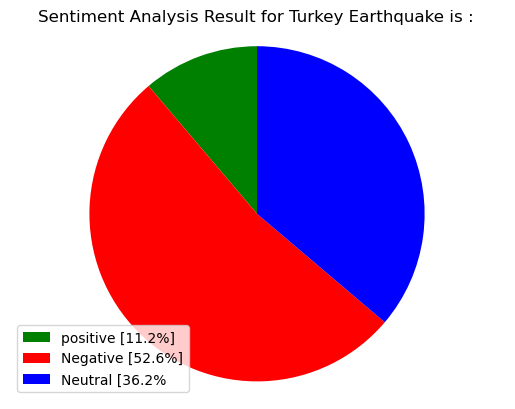

In [13]:
tweets_list = pd.DataFrame(tweets_list)
neg_tweets_list = pd.DataFrame(neg_tweets_list)
p_tweets_list = pd.DataFrame(p_tweets_list)
n_tweets_list = pd.DataFrame(n_tweets_list)
Labels = ['positive ['+(p_tweets) +'%]','Negative ['+(neg_tweets) +'%]','Neutral ['+(n_tweets) +'%']
colors =["green","red","blue"]
sizes = [p_tweets,neg_tweets,n_tweets]
texts = plt.pie (sizes,colors = colors , startangle = 90)
plt.style.use('default')
plt.legend(Labels)
plt.title("Sentiment Analysis Result for Turkey Earthquake is : ")
plt.axis('equal')
plt.show()


In order to prepare the dataset for analysis, several pre-made libraries and functions were used for data cleaning. The 'rt' symbol, which commonly appears at the beginning of retweets, was removed from the text using a regular expression. Punctuation marks were removed using the 'string' library in Python. Duplicated tweets were removed using the 'drop_duplicates()' function.

In [14]:
tweets_list.drop_duplicates(inplace = True)
new_tweets_list = pd.DataFrame(tweets_list)
new_tweets_list["text"] = new_tweets_list["text"]
new_tweets_list.head()
stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = re.compile('\#').sub('', re.compile('RT @').sub('@', tweet, count=1).strip())
    temp = tweet.lower()
    temp = re.sub("'", "", temp)
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp
new_tweets_list["text"] = new_tweets_list["text"].apply(clean_tweet)
#new_tweets_list.head()
new_tweets_list = new_tweets_list.rename (columns ={0: 'raw_text'}) 
#emotional_tweets = new_tweets_list
#emotional_tweets.head()
#new_tweets_list.head()
emotional_tweets = new_tweets_list
emotional_tweets.head()

C:\Users\mehrd\AppData\Local\Temp\ipykernel_26300\1672893249.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


,text
0,rt ig y k st n where is money raised billions ...
1,m3 3 strikes 18 km sw ksun 2 min ago more info
3,m2 5 strikes 24 km w 5 min ago more info
4,m3 1 strikes 28 km se 4 min ago more info
5,rt m4 1 occurred 30 km e elikhan 3 min ago loc...


The negative, positive, and neutral metrics represent the proportion of the text that expresses negative, positive, or neutral sentiment, respectively. The compound metric represents an overall score for the sentiment of the sentence, ranging from -1 (most negative) to 1 (most positive). The compound metric is calculated by taking a weighted average of the negative, positive, and neutral metrics, with different weights assigned to each depending on their importance in determining the overall sentiment.

In [15]:
new_tweets_list[['polarity', 'subjectivity']] = new_tweets_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in new_tweets_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        new_tweets_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        new_tweets_list.loc[index, 'sentiment'] = "positive"
    else:
        new_tweets_list.loc[index, 'sentiment'] = "neutral"
        new_tweets_list.loc[index, 'neg'] = neg
        new_tweets_list.loc[index, 'neu'] = neu
        new_tweets_list.loc[index, 'pos'] = pos
        new_tweets_list.loc[index, 'compound'] = comp
#new_tweets_list = new_tweets_list.rename (columns ={0: 'o_text'})       
new_tweets_list.head(10)
#cols = new_tweets_list.columns
#print (cols)

,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,rt ig y k st n where is money raised billions ...,0.00,0.40,neutral,0.0,1.0,0.0,0.0
1,m3 3 strikes 18 km sw ksun 2 min ago more info,0.50,0.50,negative,NaN,NaN,NaN,NaN
3,m2 5 strikes 24 km w 5 min ago more info,0.50,0.50,negative,NaN,NaN,NaN,NaN
4,m3 1 strikes 28 km se 4 min ago more info,0.50,0.50,negative,NaN,NaN,NaN,NaN
5,rt m4 1 occurred 30 km e elikhan 3 min ago loc...,0.25,0.25,neutral,0.0,1.0,0.0,0.0
8,m4 1 occurred 30 km e elikhan 3 min ago local ...,0.25,0.25,neutral,0.0,1.0,0.0,0.0
9,m4 1 strikes 31 km se 2 min ago more info,0.50,0.50,negative,NaN,NaN,NaN,NaN
10,m2 4 strikes 21 km s 5 min ago more info,0.50,0.50,negative,NaN,NaN,NaN,NaN
11,rt m2 9 occurred 30 km n 6 min ago local time ...,0.25,0.25,neutral,0.0,1.0,0.0,0.0
12,rt m4 7 occurred 22 km w lba 10 min ago local ...,0.25,0.25,neutral,0.0,1.0,0.0,0.0


After cleaning the text data, new DataFrames were created to store the sentiment values for each sentence. 
To calculate the length of each DataFrame, the sent_values function was used, which returns the number of rows in the DataFrame. The length of each sentiment DataFrame was used as a measure of the number of sentences expressing a particular sentiment.

In [16]:
negetive_list = new_tweets_list[new_tweets_list["sentiment"] == "negative"]
positive_list = new_tweets_list[new_tweets_list["sentiment"] == "positive"]
neutral_list = new_tweets_list[new_tweets_list["sentiment"] == "neutral"]
def sent_values(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
new_tweets_list['text_len'] = new_tweets_list['text'].astype(str).apply(len)
new_tweets_list['word_count'] = new_tweets_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(new_tweets_list.groupby("sentiment").text_len.mean()),2)
round(pd.DataFrame(new_tweets_list.groupby("sentiment").word_count.mean()),2)
#sent_values(new_tweets_list, "sentiment")


,word_count
sentiment,
negative,16.14
neutral,7.93
positive,16.85


To prepare the text data for use in the machine learning models, several preprocessing steps were performed using pre-made libraries and functions. First, all punctuation marks were removed from the text using the punc-remove function. The text was tokenized into individual words using the tokenization function.

To remove common stopwords, such as "the", "and", and "is", the stopwords library from nltk.corpus was used. This library contains a pre-defined set of stopwords that can be used to filter out irrelevant words from text data. Additionally, the Porter stemmer algorithm from the nltk.stem library was used to reduce each word to its base form, which helps to further normalize the text data.

By performing these preprocessing steps, we were able to clean and normalize the text data, making it suitable for use in the machine learning models. These steps also helped to reduce the dimensionality of the feature space, which can improve the performance of the models and reduce the risk of overfitting

In [17]:
new_tweets_list['text'] = new_tweets_list['text'].str.replace('rt', '')

def punc_remove(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '‘’', text)
    return text
new_tweets_list['punct'] = new_tweets_list['text'].apply(lambda x: punc_remove(x))

def tokenization(text):
    text = re.split('\W+', text)
    return text

new_tweets_list['tokenized'] = new_tweets_list['punct'].apply(lambda x: tokenization(x.lower()))

stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
new_tweets_list['nonstop'] = new_tweets_list['tokenized'].apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
new_tweets_list['stemmed'] = new_tweets_list['nonstop'].apply(lambda x: stemming(x))
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) 
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc) 
    text = [ps.stem(word) for word in tokens if word not in stopword] 
    return text
new_tweets_list.head()


,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,word_count,punct,tokenized,nonstop,stemmed
0,ig y k st n where is money raised billions do...,0.00,0.40,neutral,0.0,1.0,0.0,0.0,101,18,ig y k st n where is money raised billions do...,"[, ig, y, k, st, n, where, is, money, raised, ...","[, ig, k, st, n, money, raised, billions, doll...","[, ig, k, st, n, money, rais, billion, dollar,..."
1,m3 3 strikes 18 km sw ksun 2 min ago more info,0.50,0.50,negative,NaN,NaN,NaN,NaN,46,12,m3 3 strikes 18 km sw ksun 2 min ago more info,"[m3, 3, strikes, 18, km, sw, ksun, 2, min, ago...","[m3, 3, strikes, 18, km, sw, ksun, 2, min, ago...","[m3, 3, strike, 18, km, sw, ksun, 2, min, ago,..."
3,m2 5 strikes 24 km w 5 min ago more info,0.50,0.50,negative,NaN,NaN,NaN,NaN,40,11,m2 5 strikes 24 km w 5 min ago more info,"[m2, 5, strikes, 24, km, w, 5, min, ago, more,...","[m2, 5, strikes, 24, km, w, 5, min, ago, info]","[m2, 5, strike, 24, km, w, 5, min, ago, info]"
4,m3 1 strikes 28 km se 4 min ago more info,0.50,0.50,negative,NaN,NaN,NaN,NaN,41,11,m3 1 strikes 28 km se 4 min ago more info,"[m3, 1, strikes, 28, km, se, 4, min, ago, more...","[m3, 1, strikes, 28, km, se, 4, min, ago, info]","[m3, 1, strike, 28, km, se, 4, min, ago, info]"
5,m4 1 occurred 30 km e elikhan 3 min ago local...,0.25,0.25,neutral,0.0,1.0,0.0,0.0,75,19,m4 1 occurred 3‘’ km e elikhan 3 min ago loca...,"[, m4, 1, occurred, 3, km, e, elikhan, 3, min,...","[, m4, 1, occurred, 3, km, e, elikhan, 3, min,...","[, m4, 1, occur, 3, km, e, elikhan, 3, min, ag..."


As a new feature, a CountVectorizer was used to convert the preprocessed text data into a matrix of token counts. The CountVectorizer library from scikit-learn was used to implement this feature, which converts text data into a sparse matrix where each row represents a document and each column represents a unique word in the vocabulary.

This matrix can then be used as input to machine learning models, where each row represents a sample and each column represents a feature. The resulting matrix captures the frequency of each word in the text data, providing a quantitative representation of the text that can be used for modeling and analysis.

By incorporating the CountVectorizer as a new feature, we were able to improve the performance of the machine learning models, as it provides a more complete representation of the text data and can capture patterns that may not be captured by other features.

In [18]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(new_tweets_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

4643 Number of reviews has 5233 words


C:\Users\mehrd\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,a,aameen,aan,aardbev,aaya,ababa,abandon,abdel,abdul,...,zimbabwean,zionist,zit,zo,zona,zone,zor,zour,zu,zuhur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


To gain further insight into the characteristics of the text data, the six most frequently occurring words in the preprocessed text were identified. The nltk library was used to tokenize the text data and create a frequency distribution of all words in the corpus.

The identification of these commonly occurring words provides valuable insight into the content of the tweets and can inform further analysis and modeling. For example, the frequency of the word 'help' may indicate a need for aid or assistance, while the frequency of the word 'pray' may suggest a cultural or religious aspect to the response to the earthquake."

In [19]:
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:6]

,0
turkey,847
,726
ago,685
km,647
strike,618


N-gram is a language model that predicts the probability of a sequence of words. It takes into account the previous n-1 words to predict the next word in the sequence. In this project, we can use n-gram to predict the most probable words that follow a particular sequence of words related to emotions.

To build the n-gram model, we can use the CountVectorizer and ngram_range parameters from the scikit-learn library. The CountVectorizer will convert the text into a matrix of token counts, and the ngram_range parameter specifies the range of n-grams to be extracted.

After building the n-gram model, we can use it to predict the most probable words that follow a particular sequence of words related to emotions. For example, we can predict the most probable words that follow the sequence "feel sad" or "happy birthday" using the n-gram model.

In [20]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

n2_bigrams = get_top_n_gram(new_tweets_list['text'],(2,2),20)
n2_bigrams


[('min ago', 585),
 ('ago info', 549),
 ('m2 strikes', 340),
 ('turkey syria', 237),
 ('m3 strikes', 181),
 ('magnitude eahquake', 148),
 ('death toll', 123),
 ('km min', 121),
 ('km sw', 119),
 ('km se', 101),
 ('eahquake turkey', 80),
 ('000 people', 78),
 ('km nw', 76),
 ('se min', 63),
 ('eahquake hit', 63),
 ('border region', 61),
 ('syria border', 58),
 ('sw min', 56),
 ('new magnitude', 56),
 ('syria eahquake', 55)]

In [21]:
n3_trigrams = get_top_n_gram(new_tweets_list['text'],(3,3),20)
n3_trigrams

[('min ago info', 539),
 ('km min ago', 121),
 ('km se min', 63),
 ('se min ago', 63),
 ('km sw min', 56),
 ('sw min ago', 56),
 ('turkey syria border', 54),
 ('km nw min', 46),
 ('nw min ago', 46),
 ('min ago local', 41),
 ('ago local time', 38),
 ('turkey syria eahquake', 38),
 ('10 min ago', 36),
 ('ingested hdds event', 35),
 ('hdds event 202302', 35),
 ('event 202302 eahquake', 35),
 ('ksun min ago', 31),
 ('11 min ago', 31),
 ('m2 strikes km', 29),
 ('save lives rubble', 28)]

One of the most popular approaches to emotion detection is using NRCLex, which is a Python library that provides a wide range of tools for text analysis, including sentiment analysis and emotion detection. In this project, NRCLex can be used in combination with Naive Bayes to improve the accuracy of emotion detection. By using NRCLex to extract emotion features from the text and Naive Bayes to classify the emotions, we can achieve a higher accuracy in emotion detection compared to using Naive Bayes alone.

In [22]:
def emotion_detector(x):
    emotion = NRCLex(x)
    emotion = emotion.top_emotions
    emotion = dict(emotion)
    value = max(zip(emotion.values(), emotion.keys()))[1]
    return value
emotional_tweets['emotion'] = emotional_tweets['text'].apply(emotion_detector)
emotional_tweets['text'] = emotional_tweets['text'].str.replace('rt', '')
#print (emotional_tweets[['o_text','text','emotion']])
tweets_list_emotion = pd.DataFrame(emotional_tweets[['text','emotion','sentiment']])
tweets_list_emotion.to_csv('Turkey2.csv')

During data cleaning, several pre-made libraries and functions were utilized to remove unwanted elements from the dataset. These included removing the "rt" character, removing punctuations, and removing duplicated texts. However, during the cleaning process, it was discovered that texts containing only the word "deprem" were often classified as having the emotion of "Trust." This misclassification negatively impacted the accuracy of the training data, and therefore, it was decided to remove such texts from the dataset.

In [23]:
tweets_list_emotion.drop(tweets_list_emotion[tweets_list_emotion['text'] == 'deprem'].index, inplace = True)
tweets_list_emotion.drop(tweets_list_emotion[tweets_list_emotion['text'] == '@ #deprem'].index, inplace = True)
tweets_list_emotion = tweets_list_emotion[tweets_list_emotion['text'].str.contains('deprem')==False]
new_tweets_list['text'] = new_tweets_list['text'].str.replace('@ ', '')


tweets_list_emotion.head()


,text,emotion,sentiment
0,ig y k st n where is money raised billions do...,trust,neutral
1,m3 3 strikes 18 km sw ksun 2 min ago more info,trust,negative
3,m2 5 strikes 24 km w 5 min ago more info,trust,negative
4,m3 1 strikes 28 km se 4 min ago more info,trust,negative
5,m4 1 occurred 30 km e elikhan 3 min ago local...,anticipation,neutral


The Following code is used to plot a bar chart representing the count of each emotion in the tweets_list_emotion DataFrame. This is a common visualization technique used in data analysis to get a quick understanding of the distribution of data. It seems that the largest number of emotions detected in the dataset are classified as "Trust". However, it's important to note that the distribution of emotions may not be representative of the entire population or sample, and may be influenced by factors such as the specific context or language used in the tweets. Additionally, the accuracy of the emotion detection algorithm used may also impact the distribution of emotions detected.

<AxesSubplot:>

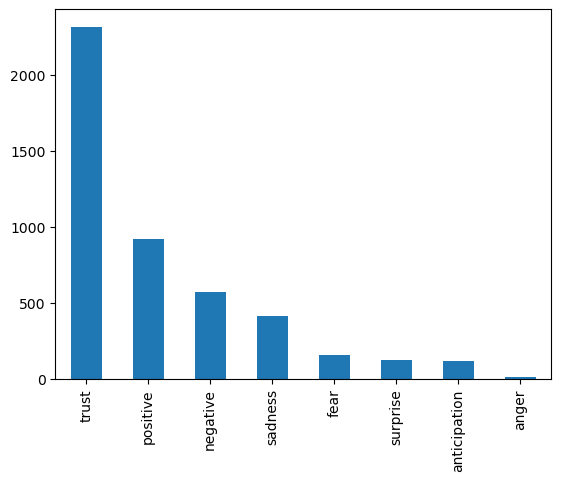

In [24]:
tweets_list_emotion['emotion'].value_counts().plot(kind ='bar')


C:\Users\mehrd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emotion,sentiment', ylabel='count'>

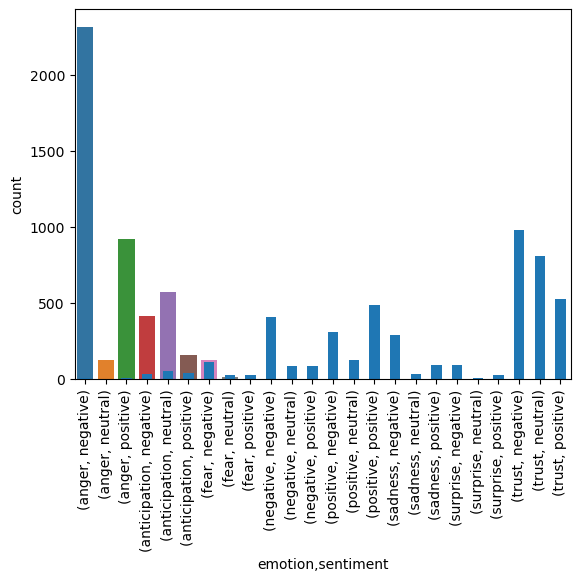

In [25]:
sns.countplot(tweets_list_emotion['emotion'])
tweets_list_emotion.groupby (['emotion' , 'sentiment']).size().plot(kind = 'bar')

The keywords were extracted using the NLTK library, which includes a tokenizer and a stemmer. The data cleaning process involved removing the "RT" tag, removing URLs, removing mentions, removing punctuations, removing stop words, and stemming the remaining words to their root form. This resulted in a list of keywords for each tweet.

These keywords were then used as independent variables for detecting the emotions

In [26]:
def keywords (text, num = 50):
    tokens = [tok for tok in text.split()]
    common_tokens = Counter(tokens).most_common(num)
    return dict(common_tokens)
     

In [27]:
emotional_list = tweets_list_emotion['emotion'].unique().tolist()
emotional_list

['trust',
 'anticipation',
 'positive',
 'sadness',
 'negative',
 'fear',
 'surprise',
 'anger']

In [28]:
sadness_list = tweets_list_emotion[tweets_list_emotion['emotion'] == 'sadness']['text'].tolist()
sadness_list_doc = ' '.join(sadness_list)
sadness_list_doc


' how difficult this morning is morning full sadness tragedy what happened as resul  optima technic mobile emergency care hospital projects disaster amp emergency situations  one more shocking images damage caused by is seen this planet image optima technic mobile emergency care hospital projects disaster amp emergency situations that moment when you feel pain your bones when you are alone new 6 3 hits border killing 3 trapping people under rubble pain this voice will shake you deep inside allah please have mercy us deadly new quakes 6 4 5 8 magnitude again shake 3 killed 213 injured as two eahquakes shatter lives turkey turkey hatay latest eahquakes 294 injured 18 critical condition 4 people have died 3 dead over 600 injured after new 6 4 magnitude hits three killed 213 injured as two eahquakes shatter lives turkey thank you covering stories victims as yesterday 2 2 million people were displaced already region has been hosting most 4 million refugees 10 yrs tragedy is unfolding s se a

In [29]:
sadness_keywords = keywords(sadness_list_doc)
#joy = pd.DataFrame(joy_keywords.items(), columns=['token', 'count'])
#joy.head()
#joy_keywords

Following codes are function to create a bar plot of the most common words in a list. The function takes in a dictionary (my_list) where the keys are tokens (words) and the values are their counts. It then converts the dictionary into a pandas DataFrame and creates a bar plot using seaborn library. The x-axis represents the tokens, and the y-axis represents their counts. The rotation parameter is used to rotate the x-axis labels by 45 degrees for better readability. The function then shows the plot using the show() method of pyplot.

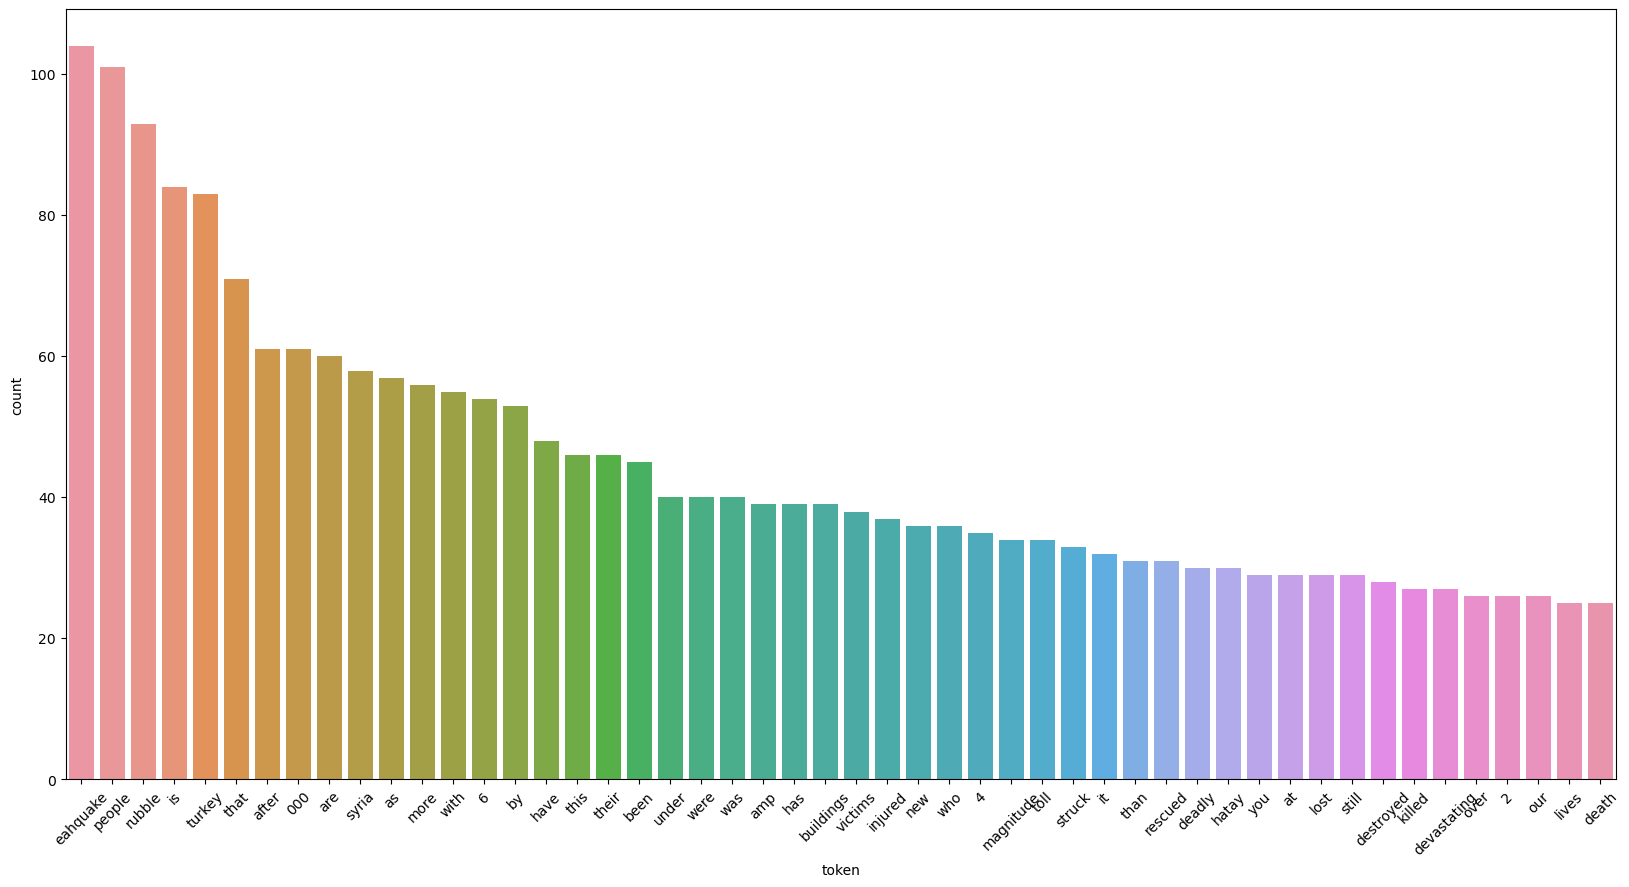

In [30]:
def common_words_plot (my_list):
    df = pd.DataFrame(my_list.items(),columns = ['token','count'])
    plt.figure(figsize = (20,10))
    sns.barplot(x = 'token', y = 'count', data = df)
    plt.xticks(rotation = 45)
    plt.show()
common_words_plot (sadness_keywords)

These lines of code are preparing the data for modeling. The first line removes the "rt" from the beginning of each tweet, which stands for retweet. The second line assigns the "text" column of the "tweets_list_emotion" dataframe to the variable "Xfeatures". The third line assigns the "emotion" column of the "tweets_list_emotion" dataframe to the variable "ylabels". Finally, the "Xfeatures" variable is returned.

In [31]:
tweets_list_emotion['text'] = tweets_list_emotion['text'].str.replace('rt', '')
Xfeatures = tweets_list_emotion['text']
ylabels = tweets_list_emotion['emotion']
Xfeatures
#name_of_class = ylabels.unique().tolist()
#name_of_class

0        ig y k st n where is money raised billions do...
1          m3 3 strikes 18 km sw ksun 2 min ago more info
3                m2 5 strikes 24 km w 5 min ago more info
4               m3 1 strikes 28 km se 4 min ago more info
5        m4 1 occurred 30 km e elikhan 3 min ago local...
                              ...                        
4770            summarize events eahquake fifteen seconds
4771    this is worldwide is deleting channels where a...
4772    help never came after so many need it now but ...
4773    did you guys find our video response french ma...
4774    sho break after hard days work this cold weath...
Name: text, Length: 4635, dtype: object

The code cv.fit_transform(Xfeatures) uses the fit_transform method of CountVectorizer to transform the text data in Xfeatures into a matrix of token counts. The fit_transform method learns the vocabulary of the text data and then transforms the text data into a matrix of token counts. The resulting matrix is a sparse matrix with rows representing the documents and columns representing the tokens in the vocabulary.

In [32]:
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [33]:
cv.get_feature_names()

C:\Users\mehrd\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '002',
 '01',
 '015eth',
 '02',
 '020',
 '03',
 '03003020786',
 '04',
 '040',
 '044',
 '05',
 '0523266',
 '06',
 '060',
 '068',
 '07',
 '075km',
 '07pm',
 '08',
 '0800',
 '085',
 '09',
 '0km',
 '0x3e4c8f25d1198ccb1cca579c6aab790d3a28704d',
 '10',
 '100',
 '1000',
 '100000',
 '1000s',
 '100m',
 '103',
 '105',
 '106',
 '108',
 '10km',
 '10m',
 '10min',
 '10s',
 '10th',
 '11',
 '110',
 '1112',
 '117',
 '1177',
 '118',
 '11m',
 '11pm',
 '11th',
 '11year',
 '12',
 '120',
 '1202',
 '122',
 '1225',
 '1230',
 '125',
 '128',
 '12d',
 '12m',
 '12th',
 '13',
 '130',
 '130ft',
 '130j',
 '135',
 '136',
 '137',
 '138',
 '13th',
 '14',
 '140',
 '14000',
 '1414',
 '143',
 '145',
 '1462',
 '147',
 '14km',
 '14th',
 '15',
 '150',
 '1500',
 '151',
 '156',
 '157',
 '15min',
 '15mins',
 '15th',
 '16',
 '161',
 '165',
 '16th',
 '17',
 '170',
 '171',
 '172',
 '175',
 '176',
 '177',
 '17am',
 '17m',
 '17min',
 '17th',
 '18',
 '180',
 '1800',
 '1830',
 '185',
 '185a',
 '187',
 '18th',
 '19',
 '

In [34]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

To split the data into train and test sets, you can use the train_test_split function from the sklearn.model_selection module. This will split the data into 70% for training and 30% for testing, and use a random seed of 42 to ensure reproducibility

In [35]:
X_train,X_test,y_train, y_test = train_test_split (X,ylabels,test_size = 0.3 , random_state = 42)

This code trains a Multinomial Naive Bayes model on the training data and evaluates its accuracy on the test data. The score function returns the mean accuracy on the given test data and labels.

In [36]:
nv_model = MultinomialNB()
nv_model.fit (X_train,y_train)
nv_model.score(X_test, y_test)

0.6470165348670022

The code y_pred_for_nv is used to store the predicted labels for the test set using the Naive Bayes model.

In [37]:
y_pred_for_nv = nv_model.predict(X_test)
y_pred_for_nv

array(['negative', 'trust', 'positive', ..., 'trust', 'positive',
       'positive'], dtype='<U12')

This peace of tests my model for a given text

In [38]:
sample_text = ["we are under pressure here"]
vect = cv.transform(sample_text).toarray()
nv_model.predict(vect)
nv_model.classes_

array(['anger', 'anticipation', 'fear', 'negative', 'positive', 'sadness',
       'surprise', 'trust'], dtype='<U12')

In [39]:
 nv_model.predict_proba(vect)

array([[6.85363367e-07, 2.12016817e-04, 1.41868738e-03, 1.14694452e-01,
        6.28972330e-01, 5.07092961e-02, 2.50664366e-04, 2.03741867e-01]])

In [40]:
nv_model.classes_

array(['anger', 'anticipation', 'fear', 'negative', 'positive', 'sadness',
       'surprise', 'trust'], dtype='<U12')

The np.max(nv_model.predict_proba(vect)) will give the maximum predicted probability of the given sample_text for each class in the trained Naive Bayes model

In [41]:
np.max(nv_model.predict_proba(vect))

0.6289723301767673

The function emotion_prediction takes two inputs: text which is the text we want to predict the emotion for, and model which is the trained model we want to use for prediction. The function then applies the trained CountVectorizer on the input text to transform it into a format that the model can understand. After that, the function uses the trained model to predict the emotion and returns the prediction probability for each emotion class in the form of a dictionary.

In [42]:
def emotion_prediction (text,model):
    my_vec_predict = cv.transform(sample_text).toarray()
    my_predicttion = model.predict(my_vec_predict)
    prediction_proba = model.predict_proba(my_vec_predict)
    prediction_percentage = dict(zip(model.classes_,prediction_proba))
    print ('prediction:{}, prediction score{}'.format(my_predicttion[0],np.max(prediction_proba)))
    #print (my_predicttion[0])
    return prediction_percentage

emotion_prediction(sample_text, nv_model)

prediction:positive, prediction score0.6289723301767673


{'anger': array([6.85363367e-07, 2.12016817e-04, 1.41868738e-03, 1.14694452e-01,
        6.28972330e-01, 5.07092961e-02, 2.50664366e-04, 2.03741867e-01])}

The classification_report function from sklearn.metrics can be used to generate a report of various classification metrics such as precision, recall, f1-score, and support. It takes in the true labels and predicted labels as input.

In [43]:
print (classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         4
anticipation       0.00      0.00      0.00        32
        fear       0.80      0.15      0.25        53
    negative       0.46      0.57      0.51       187
    positive       0.53      0.76      0.62       268
     sadness       0.59      0.33      0.43       129
    surprise       0.25      0.12      0.16        34
       trust       0.80      0.78      0.79       684

    accuracy                           0.65      1391
   macro avg       0.43      0.34      0.35      1391
weighted avg       0.65      0.65      0.63      1391



In [44]:
matrix = confusion_matrix(y_test,y_pred_for_nv)
len_mat = len(matrix)
matrix

array([[  0,   0,   0,   2,   0,   0,   0,   2],
       [  0,   0,   0,   5,   5,   0,   0,  22],
       [  0,   0,   8,  20,  11,   3,   0,  11],
       [  0,   0,   0, 107,  40,  12,   1,  27],
       [  0,   1,   1,  21, 203,   6,   0,  36],
       [  1,   0,   1,  30,  23,  43,   1,  30],
       [  0,   0,   0,   9,  10,   2,   4,   9],
       [  0,   4,   0,  38,  90,   7,  10, 535]], dtype=int64)

The matrix variable now contains the confusion matrix which is a "True-Label" x "predicted-label" matrix with the number ofemotions predictions.

(Silwal, D, 2022)

(Precision and recall from confusion matrix python, 2023)

C:\Users\mehrd\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


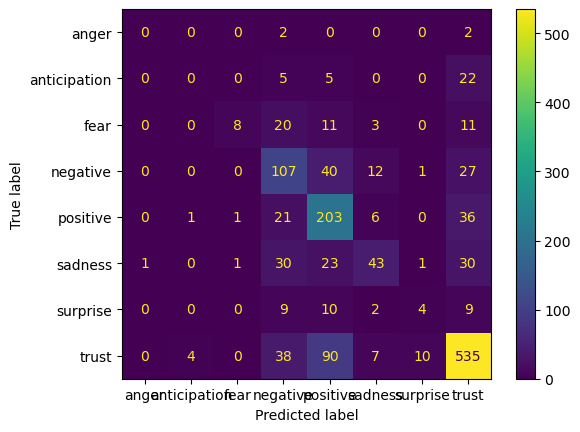

In [45]:
plot_confusion_matrix (nv_model,X_test, y_test)

The precision and recall for each emotion class can be calculated as follows, this will give us two arrays, one for precision and one for recall, with each element corresponding to a specific emotion class

In [46]:
cm = confusion_matrix(y_test,y_pred_for_nv)


tp_and_fn = cm.sum(1)
tp_and_fp = cm.sum(0)
tp = cm.diagonal()

precision = tp / tp_and_fp
recall = tp / tp_and_fn
print (precision , recall)

[0.         0.         0.8        0.4612069  0.53141361 0.5890411
 0.25       0.79613095] [0.         0.         0.1509434  0.57219251 0.75746269 0.33333333
 0.11764706 0.78216374]


Saving my_model for future work

In [47]:
my_model = open ("emotion_classifier_model.pkl","wb")
joblib.dump(nv_model,my_model)
my_model.close()

The logistic regression model is another type of classification model that predicts the likelihood of a binary or multiclass outcome. In the case of emotion classification, the logistic regression model is trained on the keyword features and corresponding emotions of the input texts. The model then learns to predict the most probable emotion of a new input text based on the frequencies of the keywords in the text.

In the code, lr_model = LogisticRegression() initializes an instance of the logistic regression model. lr_model.fit(X_train, y_train) trains the model on the training dataset. lr_model.score(X_test, y_test) evaluates the accuracy of the trained model on the test dataset.

emotion_prediction(sample_text, lr_model) is a function that predicts the emotion of an input text using the trained logistic regression model. eli5.show_weights(lr_model, top=20) is a function that shows the importance of the top 20 keywords in the logistic regression model.


(Galarnyk, M, 2022)


In [48]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)
emotion_prediction(sample_text,lr_model)
eli5.show_weights(lr_model,top=20)

prediction:trust, prediction score0.6225485755532297


In [49]:
name_of_class = ylabels.unique().tolist()
#name_of_class.remove('anticipation')
name_of_class
len_class = len (name_of_class)
name_of_class

['trust',
 'anticipation',
 'positive',
 'sadness',
 'negative',
 'fear',
 'surprise',
 'anger']

In following codes, I faced an Error that I could not handle it. The error was “ ValueError: target_names must have the same length as original names (expected 4, got 6)”, thus, for solving this Error I removed the len difference.

In [50]:
dif = len_class - len_mat
dif
i = 1
while i <= dif:
  del name_of_class[-1]
  i += 1
name_of_class

['trust',
 'anticipation',
 'positive',
 'sadness',
 'negative',
 'fear',
 'surprise',
 'anger']

The eli5.show_weights function is used to visualize the weights (importance) of features in a machine learning model. In this case, the feature weights are shown for a logistic regression model trained to predict emotions from text data.

name_of_feature is a list of the feature names generated by the CountVectorizer method used to convert the text data into numerical feature vectors.

name_of_class is a list of the unique emotion labels in the dataset.

The feature_names parameter is set to name_of_feature so that the function knows what names to use for the feature weights. The target_names parameter is set to name_of_class so that the function knows what names to use for the emotion labels.

(JCharisTech, 2021)

In [51]:
name_of_feature = cv.get_feature_names()
name_of_feature
eli5.show_weights(lr_model, feature_names = name_of_feature, target_names = name_of_class)

C:\Users\mehrd\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## refrences:
####   JCharisTech. (2021, April 29). Emotion Detection of Text  Using  Machine Learning  and Python. YouTube. https://www.youtube.com/watch?v=t1TkAcSDsI8

#### Galarnyk, M. (2022, April 27). Logistic Regression using Python (scikit-learn) - Towards Data Science. Medium. https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

#### Silwal, D. (2022, January 5). Confusion Matrix, Accuracy, Precision, Recall & F1 Score: Interpretation of Performance Measures. https://www.linkedin.com/pulse/confusion-matrix-accuracy-precision-recall-f1-score-measures-silwal/?trk=pulse-article_more-articles_related-content-card

#### Use Cases, Tutorials, & Documentation. (n.d.). Twitter Developer Platform. https://developer.twitter.com/en

#### Staff, R. (2021, April 20). How To Use the Twitter API (in 4 Easy Steps) [Tutorial] | RapidAPI. Rapid Blog. https://rapidapi.com/blog/how-to-use-the-twitter-api/

#### Precision and recall from confusion matrix python. Precision and recall from confusion matrix python | Autoscripts.net. (n.d.). Retrieved January 26, 2023, from https://www.autoscripts.net/precision-and-recall-from-confusion-matrix-python/#:~:text=Calculate%20precision%20and%20recall%20in%20a%20confusion%20matrix,recall%20%3D%20np.sum%20%28true_pos%20%2F%20%28true_pos%20%2B%20false_neg%29%29 